In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)
print(X),print(y)
X.shape

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(6, 3)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32182.4434
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 31474.1777
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 30819.9629
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 30386.0938
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 30010.7637
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 29625.5215
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 29163.8965
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 28694.7910
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 28230.6426
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 27772.4375
Epoch 11/300
1/1 [==============================] - 0s 14ms/step - loss: 27308.1562
Epoch 12/300
1/1 [==============================] - 0s 13ms/step - loss: 26819.7500
Epo

In [ ]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
      if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
      else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
print(lst_output)

[222.55531]
1 day input [196.         210.         222.55531311]
1 day output [[233.92876]]
2 day input [210.         222.55531311 233.92875671]
2 day output [[247.3748]]
3 day input [222.55531 233.92876 247.3748 ]
3 day output [[260.21927]]
4 day input [233.92876 247.3748  260.21927]
4 day output [[273.31442]]
5 day input [247.3748  260.21927 273.31442]
5 day output [[287.68054]]
6 day input [260.21927 273.31442 287.68054]
6 day output [[302.10764]]
7 day input [273.31442 287.68054 302.10764]
7 day output [[317.27826]]
8 day input [287.68054 302.10764 317.27826]
8 day output [[333.48288]]
9 day input [302.10764 317.27826 333.48288]
9 day output [[350.1967]]
[222.55531, 233.92876, 247.3748, 260.21927, 273.31442, 287.68054, 302.10764, 317.27826, 333.48288, 350.1967]


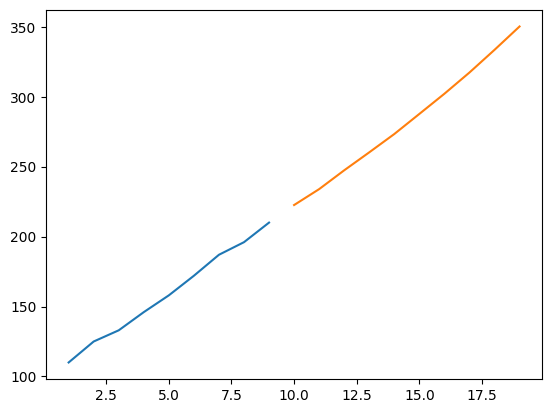

In [ ]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)